In [1]:
import  pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("complete_processed_data.csv")

In [ ]:
# Remove zero temperature; Reason: In cases where weather data is not found the values are defaulted to zero so removing them 

In [3]:
data = data[data['min_temp']!=0]

In [4]:
data = data[data['max_temp']!=0]

In [5]:
data = data[data['avg_temp']!=0]

In [6]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [7]:
y = data.distance
data = data.drop(['distance','datetime','start_time','end_time'],axis=1)
X = data

In [8]:
# As per the e-mail We are not supposed to feed any information that is not known at the start of the trip like duration
# So I am dropping it , If it is not to be dropped please comment the following code
data = data.drop(['tripduration'],axis=1)
X = data


In [9]:
data.head(5)

,from_station_id,to_station_id,usertype,gender,birthyear,month_rel,day_rel,hr_rel,max_temp,min_temp,avg_temp
0,75,57,1,1,28.0,5,1,17,57,45,51
1,75,45,1,1,25.0,5,1,17,57,45,51
2,331,232,1,1,25.0,5,1,17,57,45,51
3,7,34,1,1,27.0,5,1,17,57,45,51
4,191,182,1,1,27.0,5,1,17,57,45,51


In [10]:
# Converting to numpy format
y = y.as_matrix()
X = X.as_matrix()

 # Do not run this cell on machines constrained by memory and speed , an image of the output of this cell is attached below
 
 ![Feature Importances](img/feature_ranking_divvy.PNG)

Feature ranking:
1. feature 0 (0.323137)
2. feature 1 (0.321504)
3. feature 4 (0.197223)
4. feature 7 (0.133599)
5. feature 10 (0.004177)
6. feature 3 (0.004135)
7. feature 8 (0.004131)
8. feature 5 (0.004101)
9. feature 9 (0.004101)
10. feature 6 (0.003693)
11. feature 2 (0.000198)


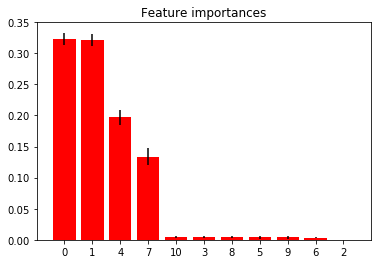

In [11]:
# Feature Importances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# From the results of the below cell the best number of estimators are 200, this cell will take a lot of resources

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier as RFC

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
oob_rfc = []
n_estimators = [20,30,50,80,100,150,200]
for n in n_estimators:
    rfc = RFC(n_estimators=n, criterion="gini",max_depth=None, min_samples_split=2, 
        min_weight_fraction_leaf=0.0,max_leaf_nodes=None, min_impurity_decrease=0.0,
        min_impurity_split=None,bootstrap=True,oob_score=True, n_jobs=6, 
                                        verbose=1, warm_start=True, class_weight=None)
    rfc.fit(X_train,y_train)
    oob_rfc.append(rfc.oob_score_)
    



[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   25.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:  2.1min finished


In [ ]:
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_estimators,oob_rfc)
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()

In [33]:
rfc = RFC(n_estimators=200, criterion="gini",max_depth=None, min_samples_split=2, 
        min_weight_fraction_leaf=0.0,max_leaf_nodes=None, min_impurity_decrease=0.0,
        min_impurity_split=None,bootstrap=True,oob_score=True, n_jobs=6, 
                                        verbose=1, warm_start=True, class_weight=None)
rfc.fit(X_train,y_train)
mean_accuracy = rfc.score(X_test,y_test)
y_pred = rfc.predict(X_test)


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    9.0s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    9.4s finished


In [43]:
mean_accuracy

0.80863191867282214

# output of above cell
![rf_ac](img/rf_ac.PNG)

In [44]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall,fscore,support = precision_recall_fscore_support(y_test, y_pred, labels =[0,1])
print(precision, recall,fscore,support)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,labels=[0,1]))

[ 0.79985905  0.81168862] [ 0.5963553   0.92100871] [ 0.68327644  0.86290003] [ 89445 168968]
             precision    recall  f1-score   support

          0       0.80      0.60      0.68     89445
          1       0.81      0.92      0.86    168968

avg / total       0.81      0.81      0.80    258413



# Grid search for the best C value , found out to be 0.001

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
C = np.array([1,0.1,0.010,0.5,0.005,0.001])
logreg = LogisticRegression()
grid = GridSearchCV(estimator=logreg, param_grid=dict(C=C), cv=10)
grid.fit(X, y)
print(grid)


In [24]:
logreg1 = LogisticRegression(C=0.001)
logreg1.fit(X_train,y_train)
y_pred_logreg = logreg1.predict(X_test)
print(logreg1.score(X_test,y_test))

0.653473315971


D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# output of the above cell
![logreg](img/logreg_pred.PNG)


In [45]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall,fscore,support = precision_recall_fscore_support(y_test, y_pred_logreg, labels =[0,1])
print(precision, recall,fscore,support)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_logreg,labels=[0,1]))

[ 0.31785714  0.65383736] [  9.95024876e-04   9.98869608e-01] [ 0.00198384  0.79033765] [ 89445 168968]
             precision    recall  f1-score   support

          0       0.32      0.00      0.00     89445
          1       0.65      1.00      0.79    168968

avg / total       0.54      0.65      0.52    258413



In [25]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
gb = gbc(n_estimators=200)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(gb.score(X_test,y_test))

0.696280759869


# output of the above cell
![gbc](img/gbc_pred.PNG)


In [46]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall,fscore,support = precision_recall_fscore_support(y_test, y_pred_gb, labels =[0,1])
print(precision, recall,fscore,support)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_gb,labels=[0,1]))

[ 0.7010714   0.69571594] [ 0.21361731  0.95178377] [ 0.32745782  0.80384978] [ 89445 168968]
             precision    recall  f1-score   support

          0       0.70      0.21      0.33     89445
          1       0.70      0.95      0.80    168968

avg / total       0.70      0.70      0.64    258413



In [47]:
# Old Friend Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_test,y_test)
y_pred_gnb = gnb.predict(X_test)
print(gnb.score(X_test,y_test))


0.621075565084


In [48]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall,fscore,support = precision_recall_fscore_support(y_test, y_pred_gnb, labels =[0,1])
print(precision, recall,fscore,support)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_gnb,labels=[0,1]))

[ 0.42247027  0.67434225] [ 0.2581251   0.81320723] [ 0.32045526  0.73729311] [ 89445 168968]
             precision    recall  f1-score   support

          0       0.42      0.26      0.32     89445
          1       0.67      0.81      0.74    168968

avg / total       0.59      0.62      0.59    258413



In [27]:
# Start Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [28]:
# Encoding class variable as integer
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [49]:
# Create Model
def model_build():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [50]:
seed=1

# evaluate model with kerac classifier 
estimator = KerasClassifier(build_fn=model_build, nb_epoch=100, batch_size=5, verbose=2)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/1
 - 181s - loss: 0.6302 - acc: 0.6552
Epoch 1/1
 - 179s - loss: 0.6301 - acc: 0.6552
Epoch 1/1
 - 194s - loss: 0.6302 - acc: 0.6552
Epoch 1/1
 - 190s - loss: 0.6301 - acc: 0.6555
Epoch 1/1
 - 184s - loss: 0.6303 - acc: 0.6550
Epoch 1/1
 - 167s - loss: 0.6303 - acc: 0.6554
Epoch 1/1
 - 171s - loss: 0.6329 - acc: 0.6529
Epoch 1/1
 - 167s - loss: 0.6303 - acc: 0.6552
Epoch 1/1
 - 170s - loss: 0.6302 - acc: 0.6552
Epoch 1/1
 - 170s - loss: 0.6330 - acc: 0.6531
Results: 65.57% (0.12%)


# output of above cell
![keras](img/keras_nn.PNG)

In [51]:
# standardise the data set and evaluate and print out the cross validation score
seed=1
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=model_build, epochs=100, batch_size=5, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
 - 174s - loss: 0.6242 - acc: 0.6589
Epoch 2/100
 - 183s - loss: 0.6226 - acc: 0.6598
Epoch 3/100
 - 205s - loss: 0.6221 - acc: 0.6597
Epoch 4/100
 - 206s - loss: 0.6218 - acc: 0.6599
Epoch 5/100
 - 201s - loss: 0.6217 - acc: 0.6599
Epoch 6/100
 - 209s - loss: 0.6217 - acc: 0.6596
Epoch 7/100
 - 207s - loss: 0.6217 - acc: 0.6597
Epoch 8/100
 - 198s - loss: 0.6216 - acc: 0.6596
Epoch 9/100
 - 198s - loss: 0.6214 - acc: 0.6590
Epoch 10/100
 - 203s - loss: 0.6213 - acc: 0.6590
Epoch 11/100
 - 207s - loss: 0.6212 - acc: 0.6588
Epoch 12/100
 - 209s - loss: 0.6210 - acc: 0.6594
Epoch 13/100
 - 199s - loss: 0.6211 - acc: 0.6591
Epoch 14/100
 - 197s - loss: 0.6210 - acc: 0.6592
Epoch 15/100
 - 196s - loss: 0.6210 - acc: 0.6592
Epoch 16/100
 - 197s - loss: 0.6210 - acc: 0.6591
Epoch 17/100
 - 204s - loss: 0.6210 - acc: 0.6590
Epoch 18/100
 - 177s - loss: 0.6210 - acc: 0.6590
Epoch 19/100
 - 175s - loss: 0.6209 - acc: 0.6589
Epoch 20/100
 - 179s - loss: 0.6209 - acc: 0.6586
Epoch 21/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-1874a57ac6ab>", line 9, in <module>
    results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 321, in cross_val_score
    pre_dispatch=pre_dispatch)
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 195, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "D:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "D:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py", line 588, in _dispatch
    job = self._b

KeyboardInterrupt: 

# AUC Curves

In [38]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, title, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title(title)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.show()

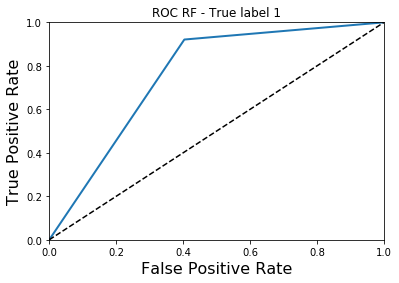

AUC: 0.758682006925


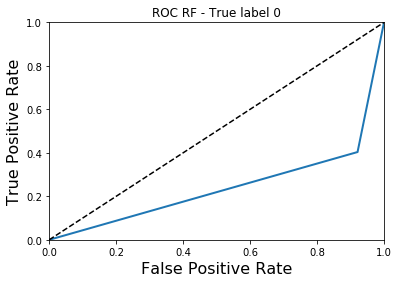

AUC: 0.241317993075


In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
plot_roc_curve(fpr, tpr,  'ROC RF - True label 1')
print("AUC:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=0)
plot_roc_curve(fpr, tpr,  'ROC RF - True label 0')
print("AUC:", auc(fpr, tpr))

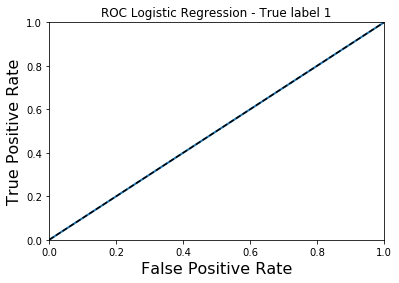

AUC: 0.499932316661


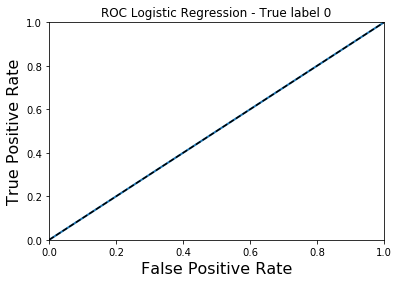

AUC: 0.500067683339


In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg, pos_label=1)
plot_roc_curve(fpr, tpr,  'ROC Logistic Regression - True label 1')
print("AUC:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg, pos_label=0)
plot_roc_curve(fpr, tpr,  'ROC Logistic Regression - True label 0')
print("AUC:", auc(fpr, tpr))

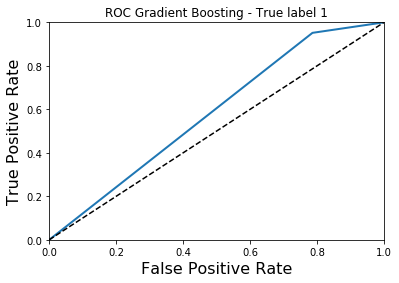

AUC: 0.582700538216


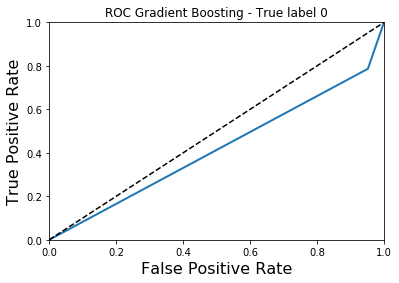

AUC: 0.417299461784


In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb, pos_label=1)
plot_roc_curve(fpr, tpr,  'ROC Gradient Boosting - True label 1')
print("AUC:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb, pos_label=0)
plot_roc_curve(fpr, tpr,  'ROC Gradient Boosting - True label 0')
print("AUC:", auc(fpr, tpr))

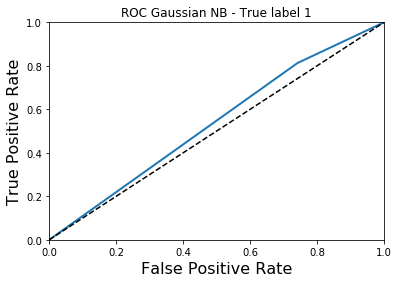

AUC: 0.535666169659


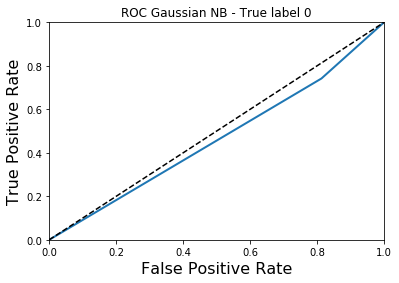

AUC: 0.464333830341


In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb, pos_label=1)
plot_roc_curve(fpr, tpr,  'ROC Gaussian NB - True label 1')
print("AUC:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb, pos_label=0)
plot_roc_curve(fpr, tpr,  'ROC Gaussian NB - True label 0')
print("AUC:", auc(fpr, tpr))